In [1]:
import nltk
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt

In [2]:
df = pd.read_pickle('data/data_frames/Electronics_5.time.pkl')
df.head()

,overall,asin,helpful,unixReviewTime
0,5,0528881469,"[0, 0]",1370131200
1,1,0528881469,"[12, 15]",1290643200
2,3,0528881469,"[43, 45]",1283990400
3,2,0528881469,"[9, 10]",1290556800
4,1,0528881469,"[0, 0]",1317254400


In [3]:
num_reviews = df.shape[0]
helpfulness_votes = [df['helpful'][i][1] for i in range(num_reviews)]

In [4]:
num_reviews

1689188

In [5]:
num_reviews = df.shape[0]
array = df[['overall', 'asin', 'helpful', 'unixReviewTime']].values
item = array[0][1]
prev_item = 'null'
count = 0
X_all = [] # stores the deviation of each item
y_all = []
num_aspects = []
num_items = 0
times = []
item_array = np.array([])

for i in range(num_reviews):
    count = count + 1
    if (count % 20000 == 0):
        print (count)
    curr_item = array[i]
    item = curr_item[1]
    if (prev_item == item):
        time.append(curr_item[3])
        if (count == num_reviews):
            min_time = min(time)
            time = [i - min_time for i in time]
            times += time
    else:
        if (num_items):
                min_time = min(time)
                time = [i - min_time for i in time]
                times += time
        num_items += 1
        time = []
        prev_item = item
        item_array = np.append(item_array, curr_item[0])
        time.append(curr_item[3])


20000
40000
60000
80000
100000
120000
140000
160000
180000
200000
220000
240000
260000
280000
300000
320000
340000
360000
380000
400000
420000
440000
460000
480000
500000
520000
540000
560000
580000
600000
620000
640000
660000
680000
700000
720000
740000
760000
780000
800000
820000
840000
860000
880000
900000
920000
940000
960000
980000
1000000
1020000
1040000
1060000
1080000
1100000
1120000
1140000
1160000
1180000
1200000
1220000
1240000
1260000
1280000
1300000
1320000
1340000
1360000
1380000
1400000
1420000
1440000
1460000
1480000
1500000
1520000
1540000
1560000
1580000
1600000
1620000
1640000
1660000
1680000


In [6]:
times_array = np.asarray(times)
times_array = times_array // (1000 * 60 * 60)

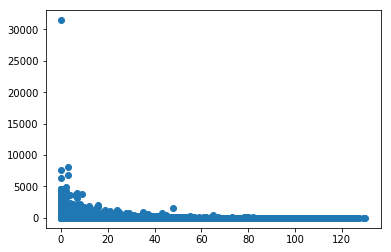

In [7]:
plt.scatter(times_array, helpfulness_votes)

In [8]:
df2 = pd.DataFrame({'times': times_array, 'votes': helpfulness_votes})

In [9]:
uni_x = np.sort(df2['times'].unique())

In [10]:
y = []
x = []
for i in uni_x:
    temp = df2.loc[df2['times'] == i]['votes']
    if temp.shape[0] > 0.001 * num_reviews:
        x.append(i)
        y.append(temp.mean())

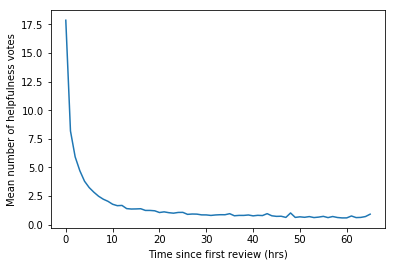

In [11]:
plt.xlabel("Time since first review (hrs)")
plt.ylabel("Mean number of helpfulness votes")
plt.plot(x, y)
plt.savefig('cell_time.png')